C:\Users\ACEGID\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


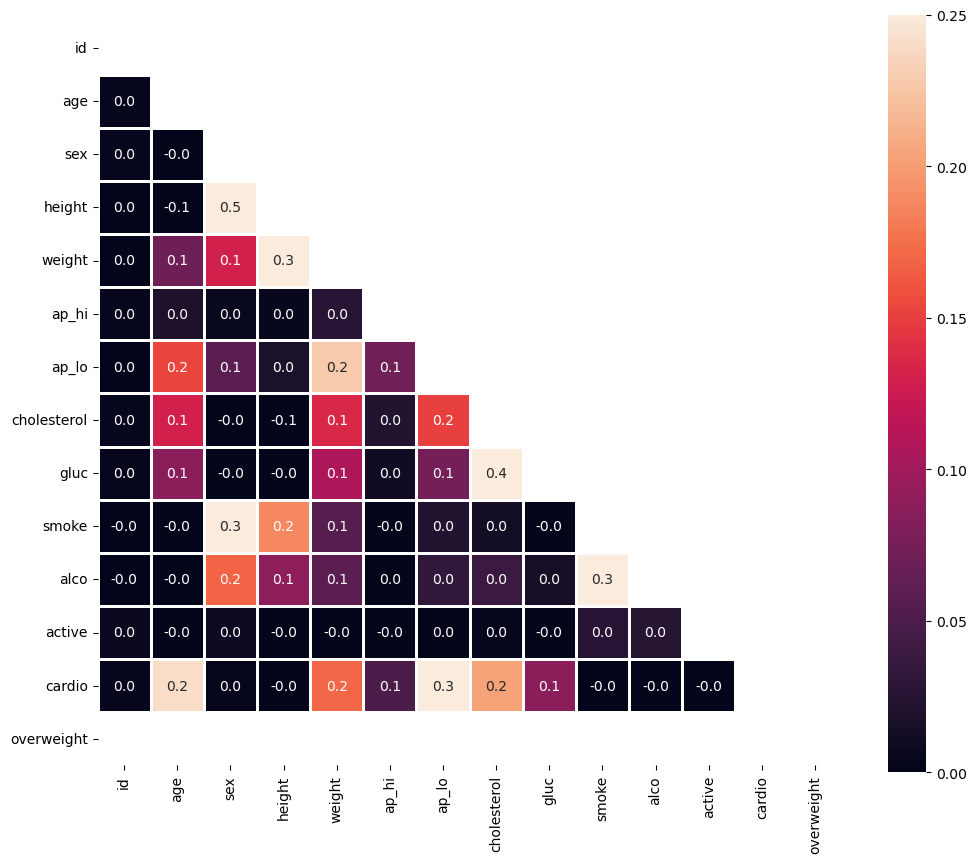

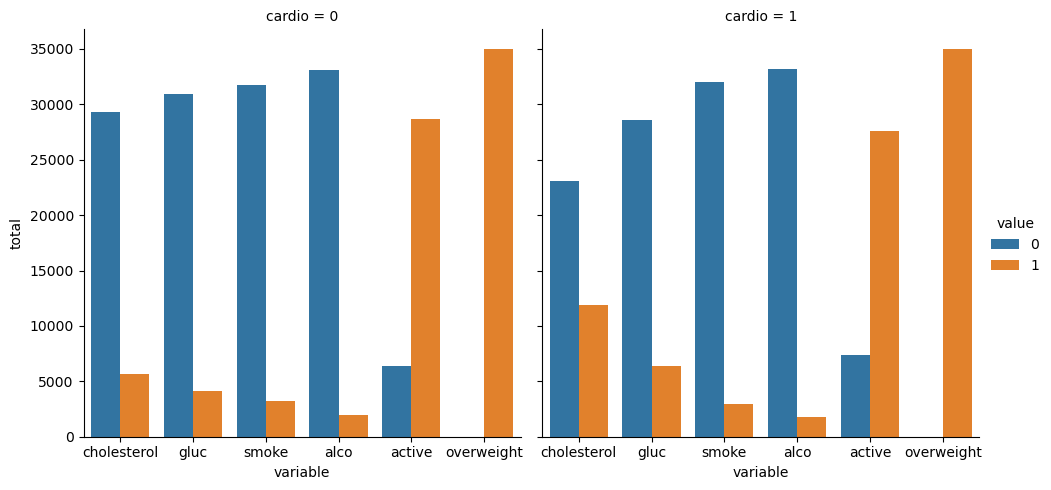

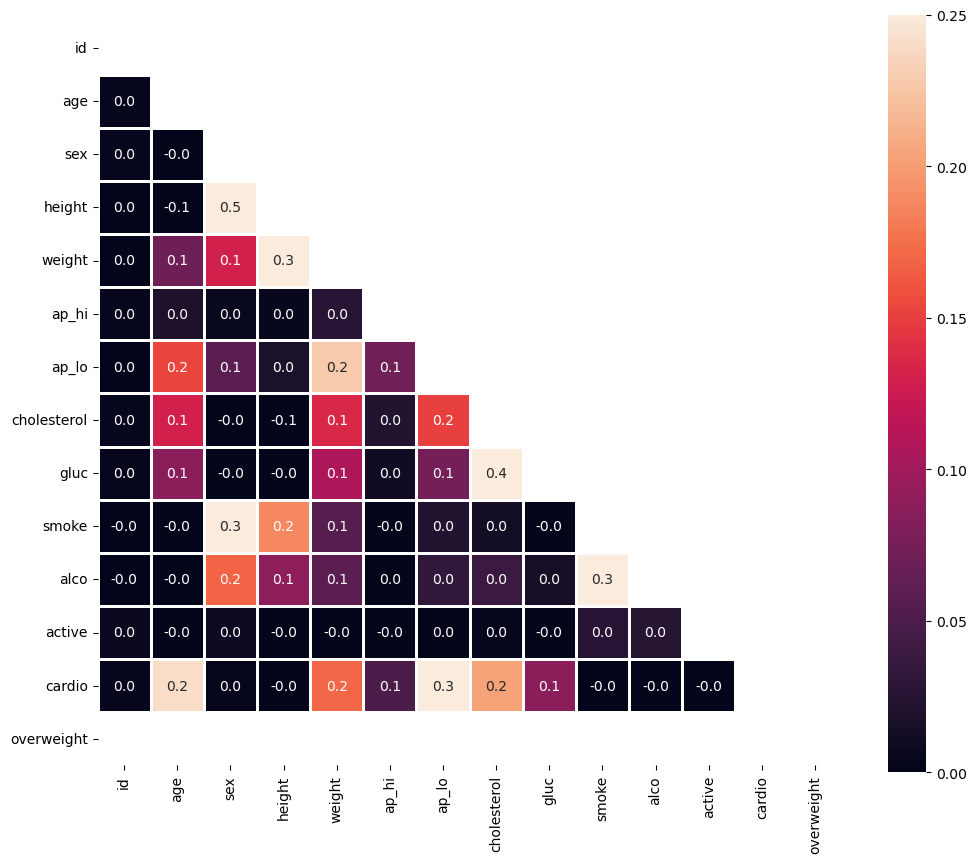

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the data from medical_examination.csv
df = pd.read_csv('medical_examination.csv')

# Create the overweight column in the df variable
df['overweight'] = np.where((df['weight'])/(df['height']/100 **2) > 25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1. 
df['cholesterol'] = np.where(df['cholesterol']== 1,0,1)

df['gluc'] = np.where(df['gluc']== 1,0,1)

# Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():

# Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable    
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars =['cholesterol','gluc','smoke','alco','active','overweight'])


    

# Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()

    figure = sns.catplot(x='variable', kind = 'count', hue = 'value', data = df_cat, col = 'cardio')

    figure.set_axis_labels('variable', 'total')
    
# Get the figure for the output and store it in the fig variable  
    fig = figure


# Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
# Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025))&
        (df['height'] <= df['height'].quantile(0.975))&
        (df['weight'] >= df['weight'].quantile(0.025))&
        (df['weight'] <= df['weight'].quantile(0.975))
        
    ]

    # Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # Generate mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype = bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (12,12))

    # Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()

    sns.heatmap(corr, vmin = 0, vmax = 0.25, fmt = '.1f', 
                linewidth = 1, annot = True, square = True, mask = mask, cbar_kws = {'shrink':.82})

    # Do not modify the next two lines
    
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()